In [1232]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1233]:
import random
np.random.seed(1234)
random.seed(1234)

In [1234]:
import warnings
warnings.filterwarnings("ignore")

### 데이터 불러오기 및 확인


In [1235]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [1236]:
# 훈련셋 확인
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1237]:
# 테스트셋 확인
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1238]:
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [1239]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [1240]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1241]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 데이터 합쳐서 전처리


In [1243]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)

In [1244]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [1245]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### null 값 확인


In [1246]:
null=all_df.isnull().sum()
null[null>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [1247]:
# 결측치가 일부인 변수 -> Alley, MasVnrType, PoolQC, Fence, MiscFeature
# 제거 X, 결측값이 아닌 없음(None으로 판단) 
null_ratio=null[(null/2919)>0.8].index
null_ratio

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [1248]:
all_df['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [1249]:
all_df['Alley']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2914    NaN
2915    NaN
2916    NaN
2917    NaN
2918    NaN
Name: Alley, Length: 2919, dtype: object

In [1250]:
all_df['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [1251]:
all_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [1252]:
all_df['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2914    NaN
2915    NaN
2916    NaN
2917    NaN
2918    NaN
Name: PoolQC, Length: 2919, dtype: object

In [1253]:
all_df['PoolQC'].value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [1254]:
all_df['Fence'].value_counts()

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64

In [1255]:
all_df['MiscFeature'].value_counts()

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64

In [1256]:
all_df['MiscFeature']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2914     NaN
2915     NaN
2916     NaN
2917    Shed
2918     NaN
Name: MiscFeature, Length: 2919, dtype: object

### 범주형 변수 확인


In [1257]:
# 데이터의 타입이 object인 특성만 출력
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [1258]:
categories.nunique()

43

In [1259]:
# 라벨인코더
# NaN값은 missing으로 처리
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)    
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [1260]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [1261]:
# NaN 값이 60% 이상인 변수들 결측치 처리 확인

In [1262]:
all_df['Alley'].value_counts()

Alley
2    2721
0     120
1      78
Name: count, dtype: int64

In [1263]:
all_df['MasVnrType'].value_counts()

MasVnrType
3    1766
1     879
2     249
0      25
Name: count, dtype: int64

In [1264]:
all_df['PoolQC'].value_counts()

PoolQC
3    2909
0       4
2       4
1       2
Name: count, dtype: int64

In [1265]:
all_df['Fence'].value_counts()

Fence
4    2348
2     329
0     118
1     112
3      12
Name: count, dtype: int64

In [1266]:
all_df['MiscFeature'].value_counts()

MiscFeature
4    2814
2      95
0       5
1       4
3       1
Name: count, dtype: int64

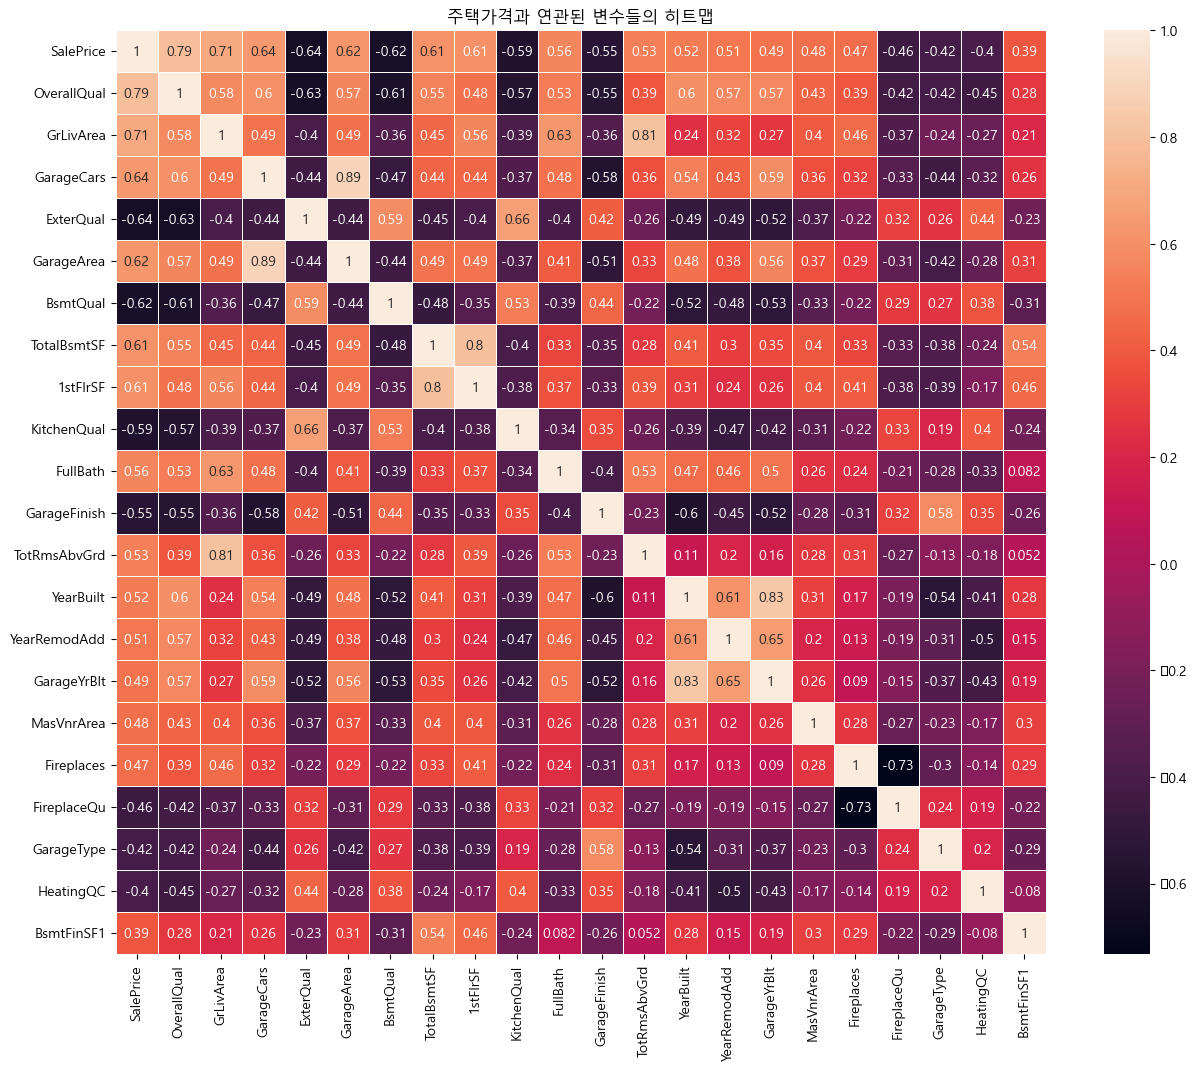

In [1267]:
# 상관관계 (SalePrice를 제외한 상위 20개 변수)
corr_matrix = all_df.corr()
top_10_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(22)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15, 12))
sns.heatmap(all_df[top_10_corr.index].corr(), annot=True, linewidths=0.5)

plt.title("주택가격과 연관된 변수들의 히트맵")
plt.show()

In [1268]:
# 종속 변수를 제외한 상관관계가 높은 변수들의 데이터 살펴보기

###### (상위 20개 변수)

###### 1. OverallQual(주택 재료&마감 품질) : 1 ~ 10까지의 숫자로 평가

###### 2. GrLivArea(지상 생활 면적) : 지하를 제외한 생활 면적 총합

###### 3. GarageCars(차고지 수용가능 차량 수) : 차고지의 수용가능 차량 수

###### 4. ExterQual(외부 재료 품질) : 외부 마감재의 품질, Ex(우수), Gd(좋음), TA(보통), Fa(보통 이하)로 등급이 나뉨

###### 5. GarageArea(차고 면적)

###### 6. BsmtQual(지하실 높이)

###### 7. TotalBsmtSF(지하실 총면적)

###### 8. 1stFlrSF(1층 면적)

###### 9. kitchenQual(주방 품질) : Ex(우수), Gd(좋음), TA(보통), Fa(보통 이하)로 등급이 나뉨

###### 10. FullBath(지상 전체 욕실 수)

###### 11. GarageFinish(차고 내부 마감 상태) : Fin(완전 마감), RFn(부분 마감), Unf(미마감), NA(차고 없음)

###### 12. TotRmsAbvGrd(지상 전체 방 수[욕실제외])

###### 13. YearBuilt(건축 연식)

###### 14. YearRemodAdd(리모델링 연도)

###### 15. GarageYrBlt(차고 건축 연도)

###### 16. MasVnrArea(외장 마감 면적)

###### 17. Fireplaces(벽난로 수)

###### 18. FireplaceQu(벽난로 품질) : Ex(우수), Gd(좋음), TA(보통), Fa(보통 이하), Po(나쁨), NA(없음)로 등급이 나뉨

###### 19. GarageType(차고 위치) : Attchd(부착된 차고), Detchd(분리된 차고), BuiltIn(내장형 차고), CarPort(카포트), Basment(지하에 위치한 차고), 2Types(두 가지 유형), NA(없음)

###### 20. HeatingQC(난방 품질) : Ex(우수), Gd(좋음), TA(보통), Fa(보통 이하), Po(나쁨)로 등급이 나뉨


### 데이터를 train_df와 test_df로 되돌리기


In [1269]:
# 데이터를 train set - test set으로 나누기
train_df_Re = all_df[~all_df["SalePrice"].isnull()]
test_df_Re = all_df[all_df["SalePrice"].isnull()]

### 전처리


##### 목적 변수 분포 확인 및 전처리


In [1270]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

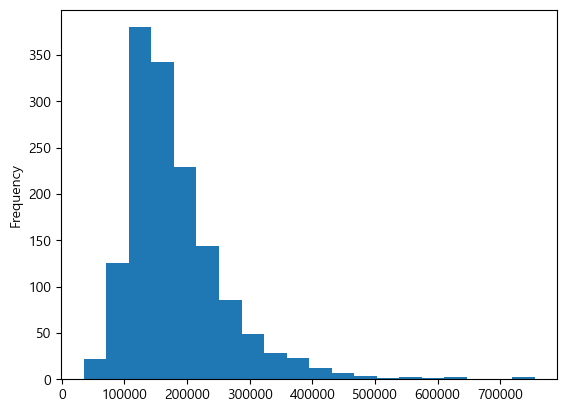

In [1271]:
train_df["SalePrice"].plot.hist(bins=20)

In [1272]:
# 종속 변수 로그화
np.log(train_df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

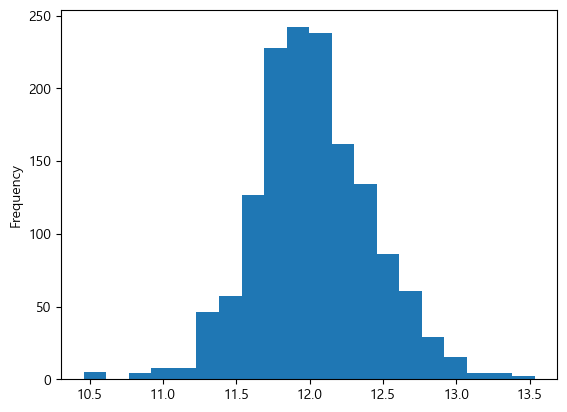

In [1273]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

### 결측치 처리


In [1274]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

SalePrice        1459
LotFrontage       486
GarageYrBlt       159
MasVnrArea         23
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
GarageCars          1
ScreenPorch         0
Functional          0
GrLivArea           0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
FullBath            0
MiscFeature         0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
3SsnPorch           0
Fence               0
FireplaceQu         0
GarageType          0
PoolQC              0
GarageFinish        0
2ndFlrSF            0
PoolArea            0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
dtype: int64

In [1275]:
all_df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914       NaN
2915    1970.0
2916    1960.0
2917       NaN
2918    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [1276]:
all_df['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [1277]:
all_df.PoolQC.value_counts()

PoolQC
3    2909
0       4
2       4
1       2
Name: count, dtype: int64

### 결측치 처리 및 피처 엔지니어링


In [1278]:
# 상관관계가 높거나 결측치의 개수가 많으 것 위주로 처리
# 상위 20개 변수 중 GarageYrBlt 의 결측치가 일부 존재
# GarageYrBlt 는 차고 건축 년도인데 차고가 존재하지 않는 경우가 NaN
# 따라서 NaN이 아닌 None(0)으로 대체

all_df['GarageYrBlt'].fillna(0, inplace=True)

# 차고지 여부로 특성 대체
all_df['HasGarage'] = all_df['GarageYrBlt'].apply(lambda x: 0 if x == 0 else 1)
all_df.drop('GarageYrBlt', axis=1, inplace=True)

In [1279]:
# Neighborhood의 특성도 반영함
# 이웃 평균 사용: 동일한 Neighborhood에 속하는 주택의 LotFrontage 평균값으로 결측치를 대체

all_df['LotFrontage'] = all_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

### 모델링


In [1280]:
# 모델링 -> 랜덤 포레스트 사용
# 사용한 이유 : 특성의 중요도를 자동으로 계산 할 수 있고, 결측치 처리에 유연하기 때문
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [1281]:
# 타겟 변수 로그화 적용 후, 학습과 테스트에 사용할 피처 선택
train_df_Re['SalePrice'] = np.log1p(train_df_Re['SalePrice'])  # 종속 변수 로그화
y = train_df_Re['SalePrice']
X = train_df_Re.drop(['SalePrice', 'Id'], axis=1)
X_test = test_df_Re.drop(['SalePrice', 'Id'], axis=1)

In [1282]:

# 훈련/검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [1283]:
# 교차 검증을 통한 성능 평가
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f'Cross-validated RMSE: {rmse_scores.mean()}')

Cross-validated RMSE: 0.14388735595992674


In [1284]:
# 검증 데이터로 예측 수행 및 평가
y_pred_valid = rf_model.predict(X_valid)
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f'Validation RMSE: {rmse_valid}')

Validation RMSE: 0.14495852052439867


In [1285]:
# 테스트 데이터 예측
y_test_pred = rf_model.predict(X_test)
y_test_pred

array([11.71438197, 11.93605155, 12.09119329, ..., 11.9352239 ,
       11.65376442, 12.33744759])

In [1286]:
# 추가적으로 라쏘 회귀 모델 사용
# 라쏘 회귀를 선택한 이유 : L1 정규화를 통해 특성을 자동 선택함,
# 특성이 많은 데이터셋에 유용하기 때문에

# 라쏘 회귀 모델 파이프라인 설정
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# 데이터 준비
# 타겟 변수 로그화 적용 후, 학습과 테스트에 사용할 피처 선택

# 종속 변수 로그화
train_df_Re['SalePrice'] = np.log1p(train_df_Re['SalePrice'])  
y = train_df_Re['SalePrice']
X = train_df_Re.drop(['SalePrice', 'Id'], axis=1)

X_test = test_df_Re.drop(['SalePrice', 'Id'], axis=1)



In [1287]:
# 결측값 처리: 수치형 변수와 범주형 변수 분리 후 각각 처리
# 수치형 변수
numeric_features = X.select_dtypes(include=[np.number]).columns

# 범주형 변수
categorical_features = X.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # 평균으로 처리
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')) # 최빈값으로 처리
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



In [1288]:
# 라쏘 회귀 모델 파이프라인 설정
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # 결측값 처리 및 스케일링
    ('lasso', Lasso(alpha=0.001, random_state=1234))  # 라쏘 회귀
])



In [1289]:
# 훈련/검증 데이터 분할
X_train, X_valid, y_train, y_valid =train_test_split(X, y,
                                    test_size=0.2, random_state=1234)

In [1290]:
# 교차 검증을 통한 성능 평가
scores = cross_val_score(lasso_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f'Cross-validated RMSE: {rmse_scores.mean()}')



Cross-validated RMSE: 0.011880511152408556


In [1291]:
# 라쏘 회귀 모델 학습 및 검증
lasso_pipeline.fit(X_train, y_train)
y_pred_valid = lasso_pipeline.predict(X_valid)
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f'Validation RMSE: {rmse_valid}')



Validation RMSE: 0.012275904121075787


In [1292]:
# 테스트 데이터 예측
y_test_pred = lasso_pipeline.predict(X_test)
y_test_pred

array([2.53975387, 2.55764094, 2.56830664, ..., 2.56136879, 2.53606335,
       2.59187746])